In [1]:
# For array computations and loading data
import numpy as np
# For building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# For building and training neural networks
import tensorflow as tf
# Custom functions
import utils
# Reduce display precision on numpy arrays
np.set_printoptions(precision=2)
# Supress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

In [2]:
# Load the dataset from the text file
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
X = data[:,0]
y = data[:,1]

# Convert 1-D arrays into 2-D , because the commands later will require it
X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs  X is: {X.shape}")
print(f"the shape of the targets y is: {y.shape}")


the shape of the inputs  X is: (50, 1)
the shape of the targets y is: (50, 1)


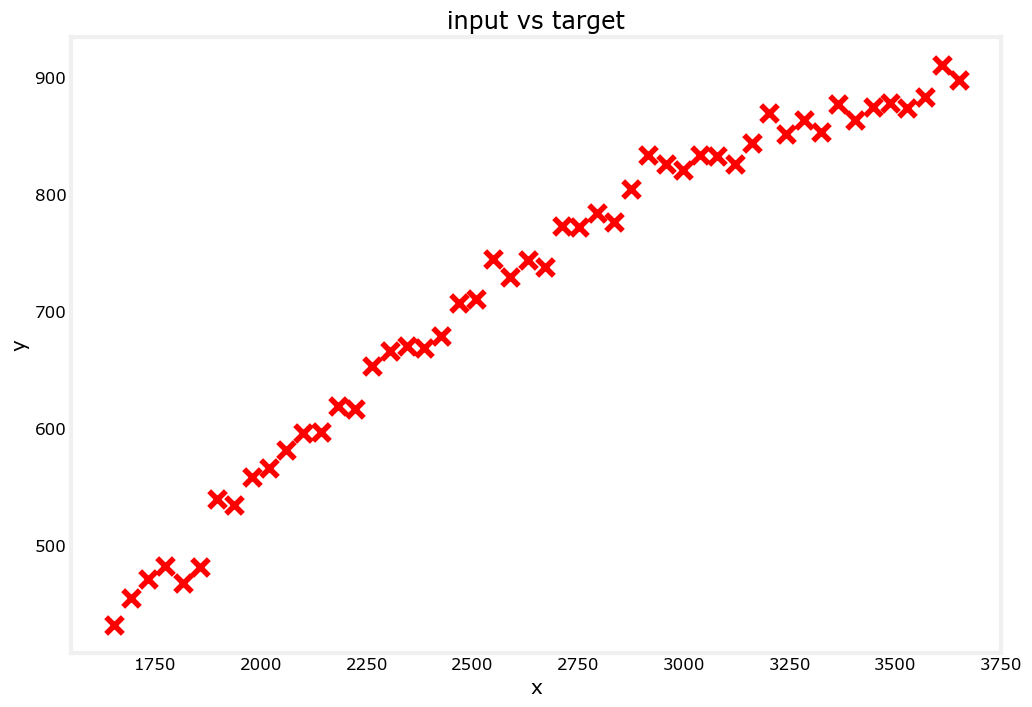

In [3]:
# Plot the entire dataset
utils.plot_dataset(x=X, y=y, title="input vs target")

In [4]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and _y.
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del X_, y_

print(f"The shape of the training set (input)  is: {X_train.shape}")
print(f"The shape of the training set (target) is: {y_train.shape}")
print(f"The shape of the cross validation set (input) is: {X_cv.shape}")
print(f"The shape of the croos validation set (target) is: {y_cv.shape}")
print(f"The shape of the test set (input) is: {X_test.shape}")
print(f"The shape of the test set (target) is: {y_test.shape}")

The shape of the training set (input)  is: (30, 1)
The shape of the training set (target) is: (30, 1)
The shape of the cross validation set (input) is: (10, 1)
The shape of the croos validation set (target) is: (10, 1)
The shape of the test set (input) is: (10, 1)
The shape of the test set (target) is: (10, 1)


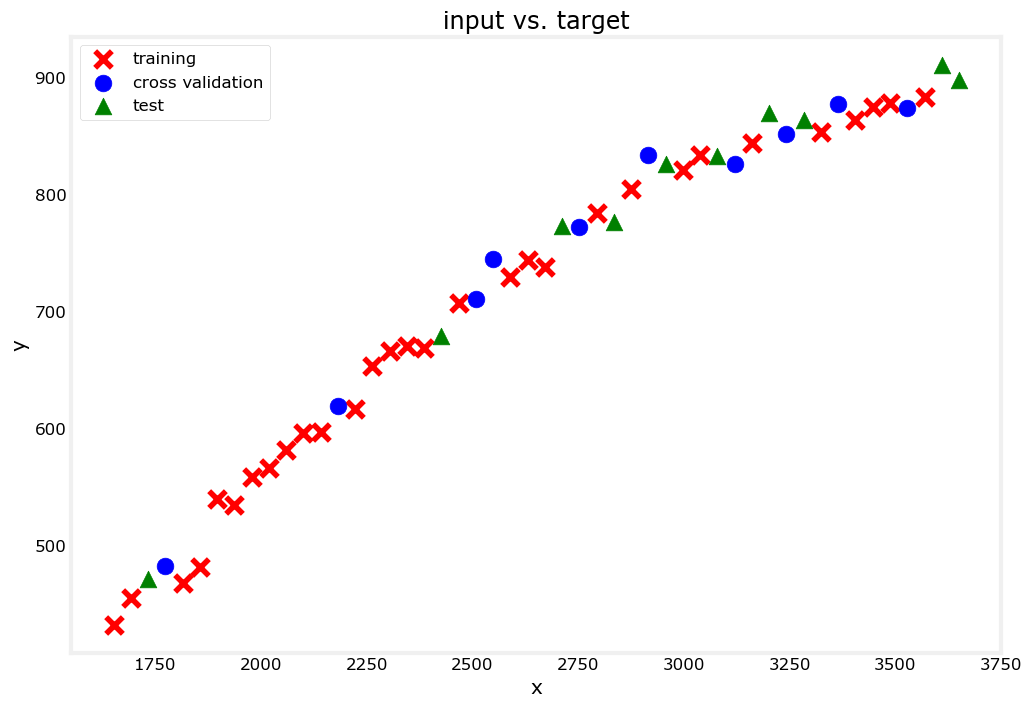

In [5]:
utils.plot_train_cv_test(X_train, y_train, X_cv, y_cv, X_test, y_test, title="input vs. target")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


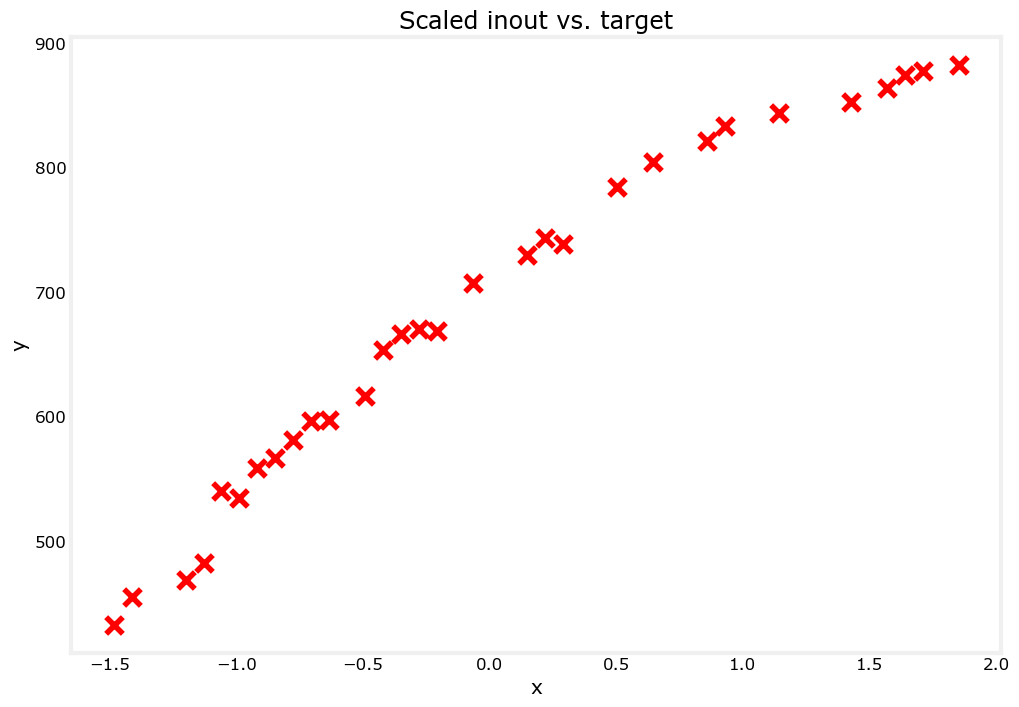

In [6]:
# Initialize the class
scaler_inliner = StandardScaler()

# Compute the mean and standard deviation of the training set the transform it
X_train_scaled = scaler_inliner.fit_transform(X_train)

print(f"Computed mean of the training set: {scaler_inliner.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_inliner.scale_.squeeze():.2f}")

# Plot the results
utils.plot_dataset(x=X_train_scaled, y=y_train, title="Scaled inout vs. target")

In [7]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [8]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Training MSE (using sklearn function): {mean_squared_error(y_train, yhat) /2}")

# For-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i = (yhat[i] - y_train[i]) **2
    total_squared_error += squared_error_i
mse = total_squared_error / (2*len(yhat))

print(f"Training MSE (for-loop implementation): {mse.squeeze()}")

Training MSE (using sklearn function): 406.19374192533155
Training MSE (for-loop implementation): 406.19374192533155


In [9]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the transform the training set
X_train_mapped = poly.fit_transform(X_train)

# Preview the first 5 elements of the new training set. Left column is 'X' and right column is 'X^2'
# Note: The `e+<number>` in the output denotes how many places the decimal point should set
# be moved. For example, `3.24e+03` is equal `3240`
print(X_train_mapped[:5])

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


In [10]:
# Instantiate the class
scaler_poly = StandardScaler()

# Computw the mean and standard deviation od the training set then train 
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


In [11]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train)

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) /2}")

# Add the polynomial features to the cross validation MSE
X_cv_mapped = poly.transform(X_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 49.111609334025175
Cross validation MSE: 87.69841211111921


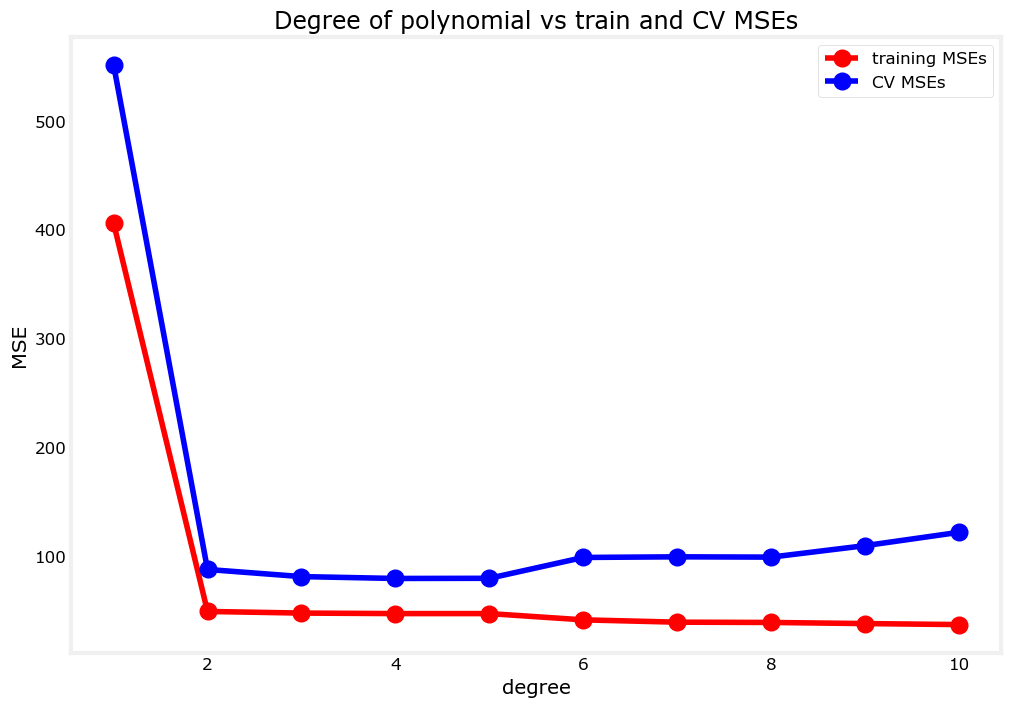

In [12]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses    = []
models     = []
scalers    = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)

    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)

    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(X_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Compute the cross validation
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)


# Plot the results
degrees = range(1,11)
utils.plot_train_cv_mses(degrees, train_mses, cv_mses, title="Degree of polynomial vs train and CV MSEs")

In [13]:
# Get the model with the lowest CV MSE (add 1 because list indices statte)
# This also correspondes to the deree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Longest CV MSE is found in the model with degree: {degree}")

Longest CV MSE is found in the model with degree: 4


In [14]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(X_test)

# Scale the test set MSE
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Training Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Training Validation MSE: 79.43
Test MSE: 104.63


In [15]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(X_train)
X_cv_mapped = poly.fit_transform(X_cv)
X_test_mapped = poly.transform(X_test)

In [16]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

In [17]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = utils.build_models()

# Loop over the models
for model in nn_models:

    # Setup the loss and optimizer
    model.compile(
        loss='mse',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )
    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    print("Done!\n")

    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)
    # Print results
    print("RESULTS:")
    for model_num in range(len(nn_train_mses)):
        print(
            f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]}"
            f" CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

Training model_1...


2023-09-16 18:45:32.344177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Done!

1/1 [==============================] - 0s 17ms/step
RESULTS:
Model 1: Training MSE: 73.43561397858974 CV MSE: 113.87
Training model_2...
Done!

1/1 [==============================] - 0s 17ms/step
RESULTS:
Model 1: Training MSE: 73.43561397858974 CV MSE: 113.87
Model 2: Training MSE: 73.39630169726416 CV MSE: 112.28
Training model_3...
Done!

1/1 [==============================] - 0s 18ms/step
RESULTS:
Model 1: Training MSE: 73.43561397858974 CV MSE: 113.87
Model 2: Training MSE: 73.39630169726416 CV MSE: 112.28
Model 3: Training MSE: 44.55696871664988 CV MSE: 88.51


In [18]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 [==============================] - 0s 21ms/step
Selected Model: 3
Training MSE: 44.56
Cross Validation MSE: 88.51
Test MSE: 87.77


In [19]:
# Load the dataset from a text file
data = np.loadtxt('data/data_w3_ex2.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x_bc = data[:,:-1]
y_bc = data[:,-1]

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis = 1)

print(f"The shape of the inputs X is: {x_bc.shape}")
print(f"The shape of the targets y is: {y_bc.shape}")

The shape of the inputs X is: (200, 2)
The shape of the targets y is: (200, 1)


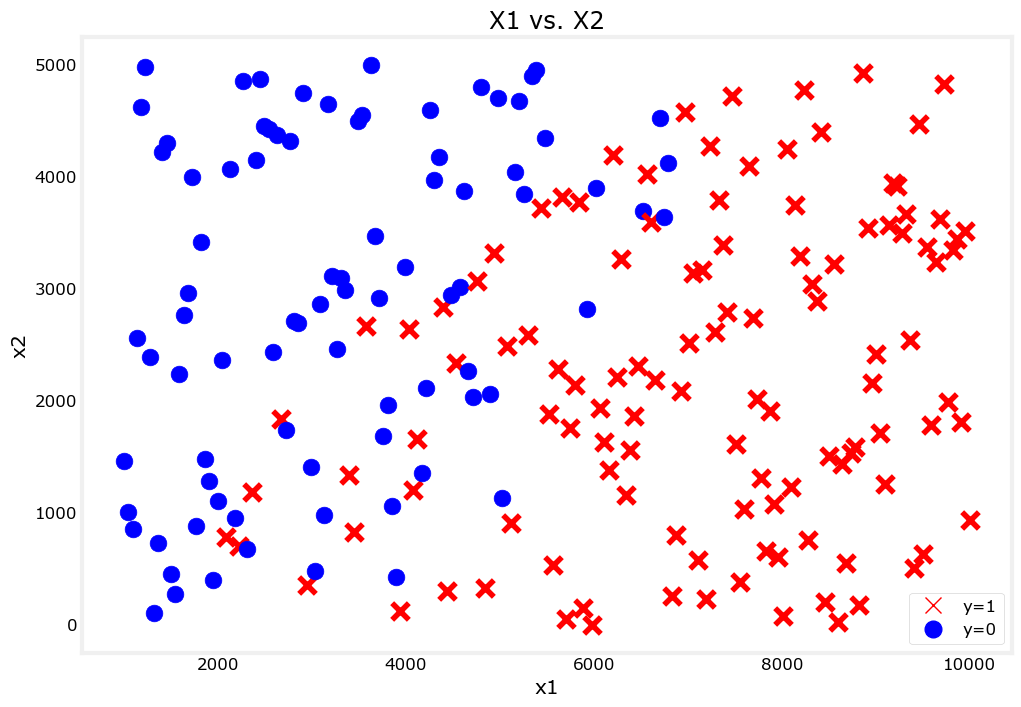

In [20]:
utils.plot_bc_dataset(x=x_bc, y=y_bc, title="X1 vs. X2")

In [21]:
from sklearn.model_selection import train_test_split

# Get 60% of the daraset as the training set. Put the remaining 40% in temporary variables.
X_bc_train, X_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_bc_cv, X_bc_test, y_bc_cv, y_bc_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del X_, y_

print(f"the shape of the training set (input) is: {X_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [22]:
# Sample model output 
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a threshold to the model output. If greater than 0.5, set to the 1. Else 0
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth lables
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialize counter for misclassified data
misclassified = 0

# Get number of predictions
num_predictions = len(predictions)

# Loop over each predictions
for i in range(num_predictions):

    # Check if it mathes the ground truth
    if predictions[i] != ground_truth[i]:

        # Add one to the counter if the prediction is wrong
        misclassified += 1

# Compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions

print(f"Probabilities: {probabilities}")
print(f"Predictions with threshold=0.5: {predictions}")
print(f"Targets: {ground_truth}")
print(f"Fraction of misclassified data (for-loop): {fraction_error}")
print(f"Fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

Probabilities: [0.2 0.6 0.7 0.3 0.8]
Predictions with threshold=0.5: [0 1 1 0 1]
Targets: [1 1 1 1 1]
Fraction of misclassified data (for-loop): 0.4
Fraction of misclassified data (with np.mean()): 0.4


In [23]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
models_bc = utils.build_bc_models()

# Loop over each model
for model in models_bc:

    # Setup the loss and optimizer
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    )
    print("Done!\n")

    # Set the threshold for classification
    threshold = 0.5

    # Record the fraction of misclassified examples for the training data
    yhat = model.predict(X_bc_train)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    # Record the fraction of misclassified examples for the cross validation data
    yhat = model.predict(X_bc_cv)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

    # Print the resuly
    for model_num in range(len(nn_train_error)):
        print(
            f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, "
            f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Done!

2/2 [==============================] - 0s 3ms/step
Model 1: Training Set Classification Error: 0.41667, CV Set Classification Error: 0.47500
Done!

2/2 [==============================] - 0s 3ms/step
Model 1: Training Set Classification Error: 0.41667, CV Set Classification Error: 0.47500
Model 2: Training Set Classification Error: 0.41667, CV Set Classification Error: 0.47500
Done!

2/2 [==============================] - 0s 4ms/step
Model 1: Training Set Classification Error: 0.41667, CV Set Classification Error: 0.47500
Model 2: Training Set Classification Error: 0.41667, CV Set Classification Error: 0.47500
Model 3: Training Set Classification Error: 0.41667, CV Set Classification Error: 0.47500


In [24]:
# Select the model wih the lowest error
model_num = 2

# Compute the test error
yhat = models_bc[model_num-1].predict(X_bc_test)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 [==============================] - 0s 2ms/step
Selected Model: 2
Training Set Classification Error: 0.4167
CV Set Classification Error: 0.4750
Test Set Classification Error: 0.3750
